# Lab 02: Exploring 50 Reuter Authors 

Erik Gabrielsen, Danh Nguyen 

## Business Understanding

In this lab we are exploring the [Reuters 50 50](https://archive.ics.uci.edu/ml/datasets/Reuter_50_50) Dataset from the UCI Repository. The dataset includes a training set and a test set, each containing 50 works of 50 different authors, for a total of 2500 articles. This dataset allows us to explore the field of authorship identification, and seeing how different authors write. The articles chosen are under the "corporate/industrial" subtopic to reduce the ability to distinguish through topics. Authors may be identifiable through certain types of words and expressions common throughout their work but not in others' works. We will only be visualizing the training set (C50training) in this lab, but the dataset will save us steps in building classification models and testing them later on. Furthermore, we may use this data to predict biases or sentiments in different authors and compare them.

In [3]:
import pandas as pd
import numpy as np
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
import random
import warnings
import seaborn as sns


directory = os.path.expanduser('~/Downloads/C50/C50train/')
articles = []
authors = []

# loop over directories: 
for author in os.listdir(directory):
    folder = os.path.join(directory, author)
    
    # loop over files in folder
    for filename in os.listdir(folder):
        with open(os.path.join(folder, filename)) as f:
            articles.append(f.read()) # append to array
            authors.append(author)

## Data Encoding

Here is where we ensure data quality. The following code cleans our data of any numbers or non english characters that could be found that we dont necissarily care about within our data set. Then we de-tokenize the words and get rid of any stop words that appear in the text. We also chose not to stem words as certain authors may use a certain form of the word more than others. For instance many authors write in the present tense and others in the passed tense and if we were to stem the words then both tenses would match to the same word, which may alter some predictions later on. This eliminates approximately 7% of the data set and 1,794 words. 

In [4]:
import re
from nltk.corpus import stopwords
cachedStopWords = stopwords.words('english')

cleaned_articles = []
for item in articles:
    letters = re.sub("[^a-zA-Z]", " ", item)
    lower_case = letters.lower()
    text = ' '.join([word for word in lower_case.split() if word not in cachedStopWords])
    cleaned_articles.append(text)

### Bag of Words

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() # an object capable of counting words in a document!

bag_words = count_vect.fit_transform(cleaned_articles)

count_vect_total = CountVectorizer() # an object capable of counting words in a document!

bag_words_total = count_vect_total.fit_transform(articles)
print(len(count_vect_total.vocabulary_))
print(len(count_vect.vocabulary_))

29137
27343


In [4]:
print(bag_words.shape) # this is a sparse matrix
print('=========')
# print(bag_words[0])

(2500, 27343)


In [5]:
pd.options.display.max_columns = 999
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())

df_frequency.head()

,aa,aaa,aah,aaron,aart,ab,aba,abadoning,abandon,abandoned,abandoning,abated,abating,abb,abbey,abbott,abbreviated,abc,abdelkader,abdicating,abdidjan,abducted,abduction,abductions,abdulaziz,abdureschit,abel,abelardo,abercrombie,aberdeen,abettors,abf,abhishek,abhor,abhorred,abhorrence,abhors,abi,abide,abides,abiding,abidjan,abile,abilities,ability,abishek,abject,ablait,ablaze,able,abn,abnomals,abnormal,abnormally,abnormals,abnornals,abnornmal,aboard,abode,abolish,abolished,abolishing,abolition,abominable,aboput,aboriginal,abormal,aborted,abortive,abound,abounded,abounds,abraham,abril,abroad,abrupt,abruptly,abseil,absence,absent,absolute,absolutely,absorb,absorbable,absorbed,absorbing,absorbs,abstain,abstained,abstruse,absurd,abu,abundance,abundant,abundantly,abuse,abused,abuses,abusing,abuts,abuzz,abysmal,ac,acacia,academia,academic,academics,academy,acapulco,acc,accc,acccess,accelerate,accelerated,accelerates,accelerating,acceleration,accelerator,accelerators,accellerator,accent,accents,accentuated,accept,acceptability,acceptable,acceptance,acceptances,accepted,accepting,acceptors,accepts,accesion,access,accessed,accessible,accessing,accession,accessories,accident,accidental,accidents,acclaimed,acclerate,accolades,accolate,accommodate,accommodating,accommodation,accomodate,accomodating,accomodation,accompanied,accompany,accompanying,accompli,accomplices,accomplish,accomplished,accomplishing,accomplishments,accontancy,accord,accordance,accorded,according,accordingly,accords,account,accountability,accountable,accountancy,accountant,accountants,accounted,accounting,accountings,accounts,accreditation,accredited,accretive,accross,accrue,accruing,accumlated,accumulate,accumulated,accuracy,accurate,accurately,accusation,accusations,accuse,accused,accuses,accusing,accustomed,ace,acer,aces,acess,aches,achievable,achieve,achieved,achievement,achievements,achieving,achilles,achinsk,achinsky,acid,acidity,acids,acitivity,acknowledge,acknowledged,acknowledgement,acknowledges,acknowledging,acknowledgment,acknowleged,acmi,acount,acounts,acoustic,acpc,acquainted,acquire,acquired,acquirer,acquirers,acquiring,acquiror,acquirors,acquisition,acquisitions,acquisitive,acquistion,acquittal,acquitted,acqusiiton,acqusisitions,acqusition,acqusitions,acre,acres,acrimonious,acrobat,acronym,across,acrylic,acrylonitrile,acs,act,acted,acting,action,actionnaires,actions,activate,activated,active,actively,actives,activex,activision,activism,activist,activists,activites,activities,activity,acton,actor,actors,actress,acts,actual,actualise,actually,actuaries,actuary,actuators,acute,acutely,ad,adacte,adam,adamant,adamantly,adams,adande,adapt,adaptable,adaptations,adaptec,adapted,adapter,adapters,adapting,adaption,adb,add,addded,added,addicted,addiction,addictive,addicts,adding,addition,additional,additionally,additions,additive,additives,address,addressed,addresses,addressing,adds,adef,adelaide,adelman,adept,adequacy,adequate,adequately,adhere,adhered,adherents,adhesive,adhesives,adiake,adidas,adjacent,adjoining,adjoins,adjourn,adjourned,adjourning,adjournment,adjust,adjustable,adjusted,adjusting,adjustment,adjustments,adm,administartion,administer,administered,administers,administration,administrations,administrative,administratively,administrator,administrators,adminstration,adminstrative,admiral,admire,admired,admirer,admission,admissions,admit,admits,admittance,admitted,admittedly,admitting,adobe,adolescent,adolf,adolph,adome,adopt,adopted,adopting,adoption,adopts,adorded,adorned,adr,adressing,adrian,adriano,adrift,adroh,adrs,ads,adss,adt,adulation,adulatory,adult,adults,advance,advanced,advancers,advances,advancing,advantage,advantageous,advantages,advent,adventure,adventurers,adventurous,adversaries,adverse,adversely,adverstising,advert,advertise,advertised,advertisement,advertisements,advertiser,advertisers,advertises,advertising,adverts,advice,advise,advised,adviser,advisers,advises,advising,advisor,advisors,advisory,advocacy,advocate,advocated,advocates,adv

In [6]:
print(len(count_vect.vocabulary_))

27343


In [7]:
count_vect.inverse_transform(bag_words[0])

[array(['internet', 'may', 'overflowing', 'new', 'technology', 'crime',
        'cyberspace', 'still', 'old', 'fashioned', 'variety', 'national',
        'consumers', 'league', 'said', 'wednesday', 'popular', 'scam',
        'pyramid', 'scheme', 'early', 'investors', 'bogus', 'fund', 'paid',
        'deposits', 'later', 'non', 'profit', 'consumer', 'advocacy',
        'group', 'tracks', 'web', 'scams', 'site', 'set', 'world', 'wide',
        'february', 'called', 'fraud', 'watch', 'http', 'www', 'org',
        'collects', 'reports', 'directly', 'widely', 'praised', 'law',
        'enforcement', 'agencies', 'suspect', 'critical', 'information',
        'jodie', 'bernstein', 'director', 'federal', 'trade', 'commission',
        'bureau', 'protection', 'major', 'help', 'ftc', 'identifying',
        'particular', 'infancy', 'example', 'used', 'shut', 'run',
        'fortuna', 'alliance', 'taken', 'million', 'promising', 'could',
        'earn', 'month', 'initial', 'deposit', 'instead', 'ke

### TFIDF

Here we create a sparse encoded tf-idf representation of the word corpus. We can then use this TF-IDF representation to find the most prominent/relevant words in the entire corpus as well as individual authors. By finding the top words for each author ranked by TF-IDF, we can begin to make predictions on who authored certain texts by analyzing the TF-IDF representation of the passage with the TF-IDF of the authors past texts.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

tfidf_mat = tfidf_vect.fit_transform(cleaned_articles) 

In [9]:
# convert to pandas to get better idea about the data
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df.head()

,aa,aaa,aah,aaron,aart,ab,aba,abadoning,abandon,abandoned,abandoning,abated,abating,abb,abbey,abbott,abbreviated,abc,abdelkader,abdicating,abdidjan,abducted,abduction,abductions,abdulaziz,abdureschit,abel,abelardo,abercrombie,aberdeen,abettors,abf,abhishek,abhor,abhorred,abhorrence,abhors,abi,abide,abides,abiding,abidjan,abile,abilities,ability,abishek,abject,ablait,ablaze,able,abn,abnomals,abnormal,abnormally,abnormals,abnornals,abnornmal,aboard,abode,abolish,abolished,abolishing,abolition,abominable,aboput,aboriginal,abormal,aborted,abortive,abound,abounded,abounds,abraham,abril,abroad,abrupt,abruptly,abseil,absence,absent,absolute,absolutely,absorb,absorbable,absorbed,absorbing,absorbs,abstain,abstained,abstruse,absurd,abu,abundance,abundant,abundantly,abuse,abused,abuses,abusing,abuts,abuzz,abysmal,ac,acacia,academia,academic,academics,academy,acapulco,acc,accc,acccess,accelerate,accelerated,accelerates,accelerating,acceleration,accelerator,accelerators,accellerator,accent,accents,accentuated,accept,acceptability,acceptable,acceptance,acceptances,accepted,accepting,acceptors,accepts,accesion,access,accessed,accessible,accessing,accession,accessories,accident,accidental,accidents,acclaimed,acclerate,accolades,accolate,accommodate,accommodating,accommodation,accomodate,accomodating,accomodation,accompanied,accompany,accompanying,accompli,accomplices,accomplish,accomplished,accomplishing,accomplishments,accontancy,accord,accordance,accorded,according,accordingly,accords,account,accountability,accountable,accountancy,accountant,accountants,accounted,accounting,accountings,accounts,accreditation,accredited,accretive,accross,accrue,accruing,accumlated,accumulate,accumulated,accuracy,accurate,accurately,accusation,accusations,accuse,accused,accuses,accusing,accustomed,ace,acer,aces,acess,aches,achievable,achieve,achieved,achievement,achievements,achieving,achilles,achinsk,achinsky,acid,acidity,acids,acitivity,acknowledge,acknowledged,acknowledgement,acknowledges,acknowledging,acknowledgment,acknowleged,acmi,acount,acounts,acoustic,acpc,acquainted,acquire,acquired,acquirer,acquirers,acquiring,acquiror,acquirors,acquisition,acquisitions,acquisitive,acquistion,acquittal,acquitted,acqusiiton,acqusisitions,acqusition,acqusitions,acre,acres,acrimonious,acrobat,acronym,across,acrylic,acrylonitrile,acs,act,acted,acting,action,actionnaires,actions,activate,activated,active,actively,actives,activex,activision,activism,activist,activists,activites,activities,activity,acton,actor,actors,actress,acts,actual,actualise,actually,actuaries,actuary,actuators,acute,acutely,ad,adacte,adam,adamant,adamantly,adams,adande,adapt,adaptable,adaptations,adaptec,adapted,adapter,adapters,adapting,adaption,adb,add,addded,added,addicted,addiction,addictive,addicts,adding,addition,additional,additionally,additions,additive,additives,address,addressed,addresses,addressing,adds,adef,adelaide,adelman,adept,adequacy,adequate,adequately,adhere,adhered,adherents,adhesive,adhesives,adiake,adidas,adjacent,adjoining,adjoins,adjourn,adjourned,adjourning,adjournment,adjust,adjustable,adjusted,adjusting,adjustment,adjustments,adm,administartion,administer,administered,administers,administration,administrations,administrative,administratively,administrator,administrators,adminstration,adminstrative,admiral,admire,admired,admirer,admission,admissions,admit,admits,admittance,admitted,admittedly,admitting,adobe,adolescent,adolf,adolph,adome,adopt,adopted,adopting,adoption,adopts,adorded,adorned,adr,adressing,adrian,adriano,adrift,adroh,adrs,ads,adss,adt,adulation,adulatory,adult,adults,advance,advanced,advancers,advances,advancing,advantage,advantageous,advantages,advent,adventure,adventurers,adventurous,adversaries,adverse,adversely,adverstising,advert,advertise,advertised,advertisement,advertisements,advertiser,advertisers,advertises,advertising,adverts,advice,advise,advised,adviser,advisers,advises,advising,advisor,advisors,advisory,advocacy,advocate,advocated,advocates,adv

In [10]:
import pandas as pd

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 
plt.style.use('ggplot')

## Word Clouds

Below is a word cloud of the words used in the entire corpus based on the word frequency. In this visualization we can see that words like "percent", "million", "marker", "china" indicate that many of these texts could be under an economical, business, or marketing genre. After seeing that "said" is the most common word in the corpus we are making the assumption that there is a lot of dialog in these texts as the author would list a person and quote what he/she said. 

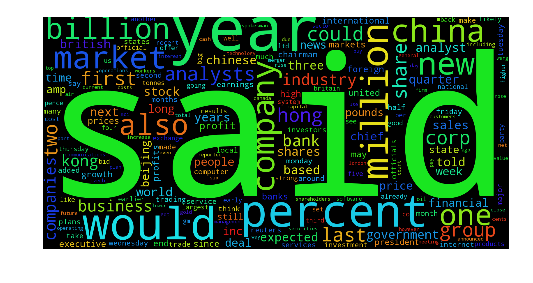

In [11]:
# Creating word cloud Frequency
from wordcloud import WordCloud, STOPWORDS
freq = df_frequency.sum().sort_values()[-2000:].to_dict()

tuples = tuple([tuple(x) for x in freq.items()])

wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(tuples)
plt.imshow(wordcloud)
plt.axis("off")
plt.figure( figsize=(10,20) )
plt.show()

The next wordcloud is based on TF-IDF. The largest words have the highest TF-IDF in the entire document corpus. Here we can further see patterns of genres in business, finance or news based on large words like "intuit","cbc", "steel", and "atm".  This could be meaninful in looking at other texts and seeing if certain very relative words fit into the general genre of this set of documents. 

In [9]:
# Creating word cloud TF IDF
most_rel = df.max().sort_values()[-2000:].to_dict()
tuples_tfidf = tuple([tuple(x) for x in most_rel.items()])

wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(tuples_tfidf)
plt.imshow(wordcloud)
plt.axis("off")
plt.figure( figsize=(10,20) )
plt.show()

NameError: name 'df' is not defined

The following word clouds are the same as above but using a diffent image stencil. Rather than just a square we decided to have fun and depict the words in the negative space of an image of Professor Larson. This was done by taking an image and creating a stencil version of the image by using black and white pixels. Then we create a mask where the words will appear by masking to the black space in the image. The stencil image can be viewed in this directory as 'patternizeimg.png'

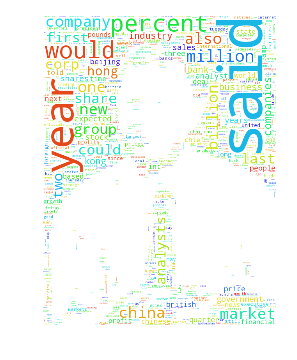

In [13]:
from PIL import Image
import numpy as np

from wordcloud import WordCloud, STOPWORDS

script_dir = os.path.dirname(os.path.expanduser("~/MachineLearning/Lab02/"))
# patternizeimg
alice_mask = np.array(Image.open(os.path.join(script_dir, 'patternizeimg.png')))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text).generate_from_frequencies(tuples)

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

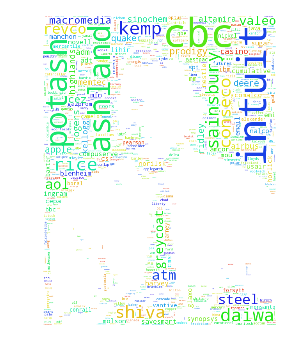

In [14]:
# generate word cloud
wc.generate(text).generate_from_frequencies(tuples_tfidf)

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

In [15]:
df_frequency.sum().sort_values()[-10:]

billion     3058
china       3154
market      3336
new         3547
company     3778
million     4877
would       5202
percent     5296
year        5386
said       19856
dtype: int64

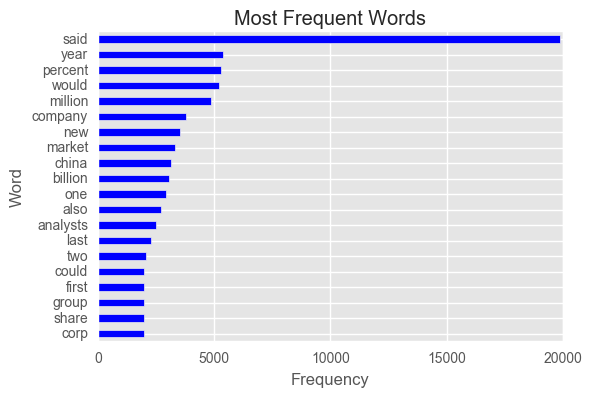

In [16]:
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

In [17]:
most_rel = df.max().sort_values()[-20:]
most_rel

rogers        0.758104
prodigy       0.760541
cez           0.760783
macromedia    0.760991
greycoat      0.762087
valeo         0.763790
aol           0.770237
atm           0.772200
steel         0.773742
revco         0.774348
shiva         0.776267
conseco       0.777747
kemp          0.784070
rice          0.788661
daiwa         0.790479
sainsbury     0.799519
ashland       0.799767
potash        0.810866
cbc           0.812043
intuit        0.867471
dtype: float64

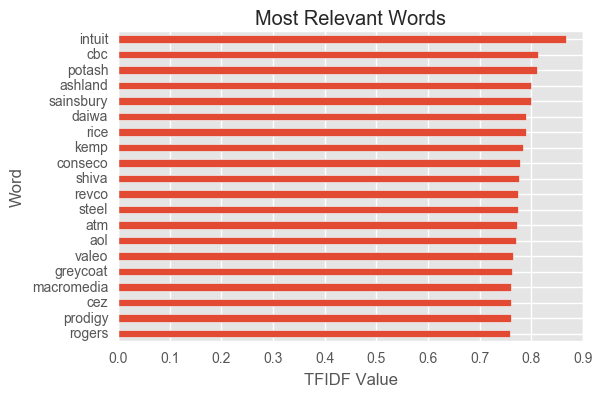

In [18]:
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

## Word Visualization by Author

In [19]:
by_author = dict()
for i in range(0, 2500, 50):
    by_author[authors[i]] = cleaned_articles[i:i+50]

### Aaron Pressman

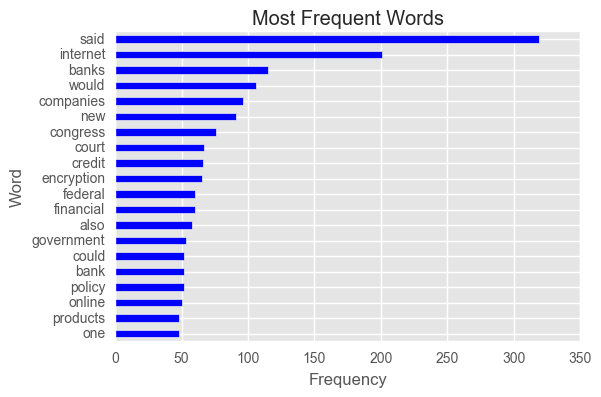

In [20]:
bag_words = count_vect.fit_transform(by_author['AaronPressman'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

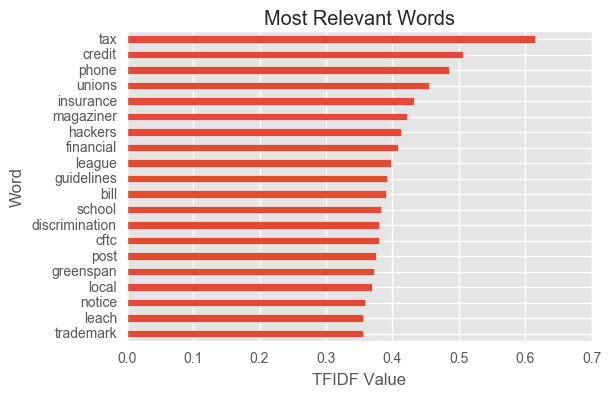

In [21]:
tfidf_mat = tfidf_vect.fit_transform(by_author['AaronPressman'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Alan Crosby

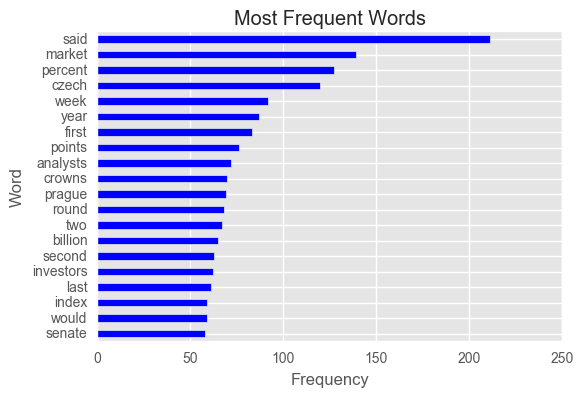

In [22]:
bag_words = count_vect.fit_transform(by_author['AlanCrosby'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

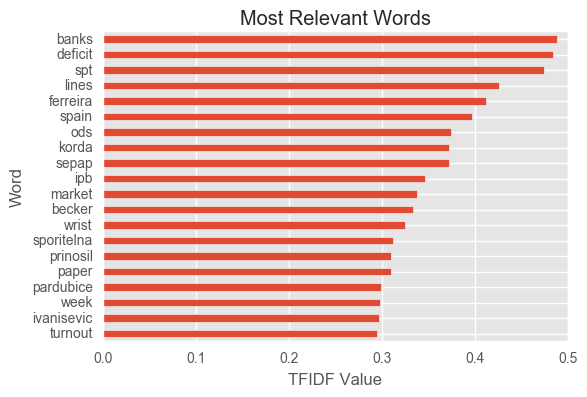

In [23]:
tfidf_mat = tfidf_vect.fit_transform(by_author['AlanCrosby'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Alexander Smith

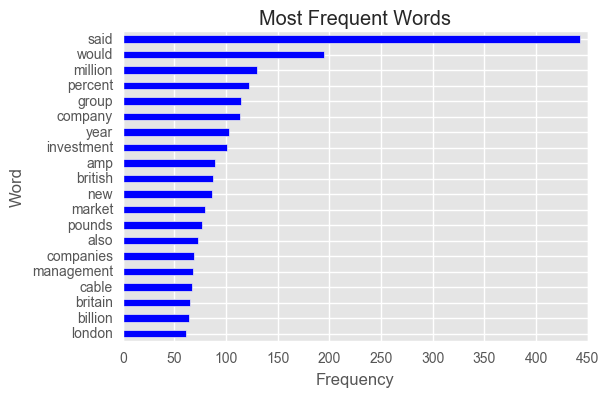

In [24]:
bag_words = count_vect.fit_transform(by_author['AlexanderSmith'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

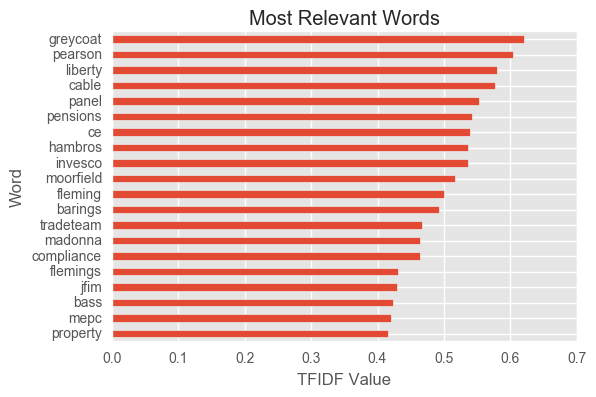

In [25]:
tfidf_mat = tfidf_vect.fit_transform(by_author['AlexanderSmith'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Benjamin Kang Lim

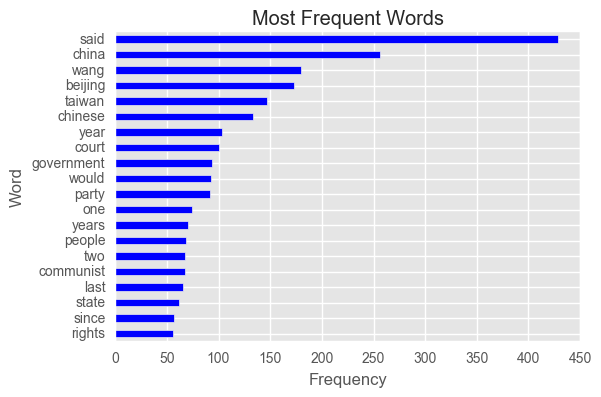

In [26]:
bag_words = count_vect.fit_transform(by_author['BenjaminKangLim'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

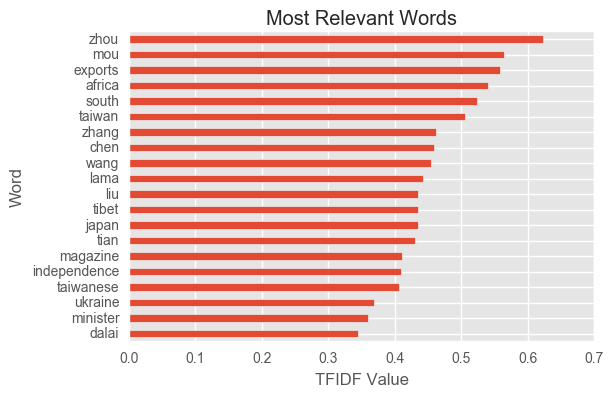

In [27]:
tfidf_mat = tfidf_vect.fit_transform(by_author['BenjaminKangLim'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Bernard Hickey

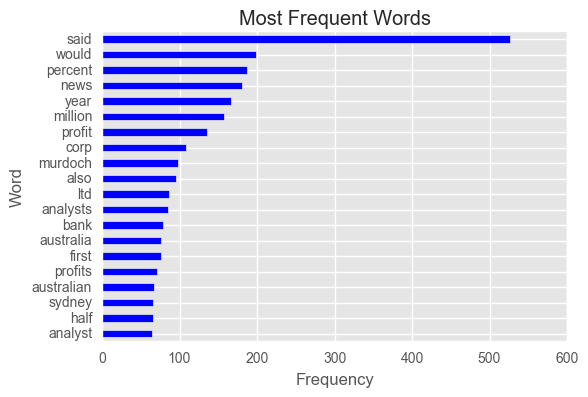

In [28]:
bag_words = count_vect.fit_transform(by_author['BernardHickey'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

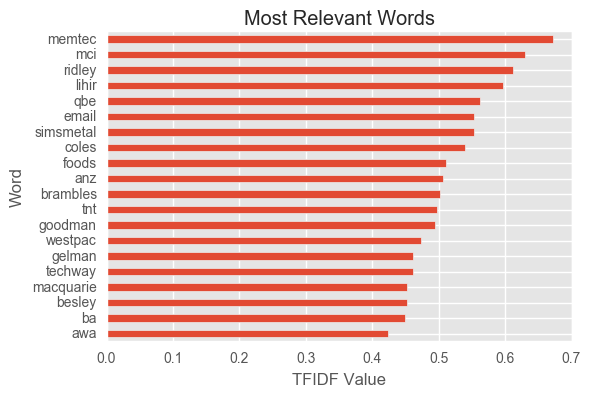

In [29]:
tfidf_mat = tfidf_vect.fit_transform(by_author['BernardHickey'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Brad Dorfman

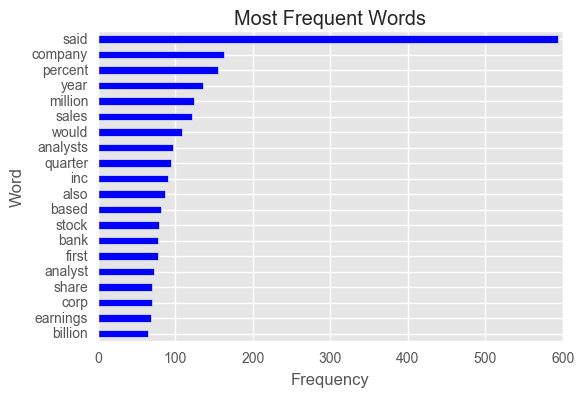

In [30]:
bag_words = count_vect.fit_transform(by_author['BradDorfman'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

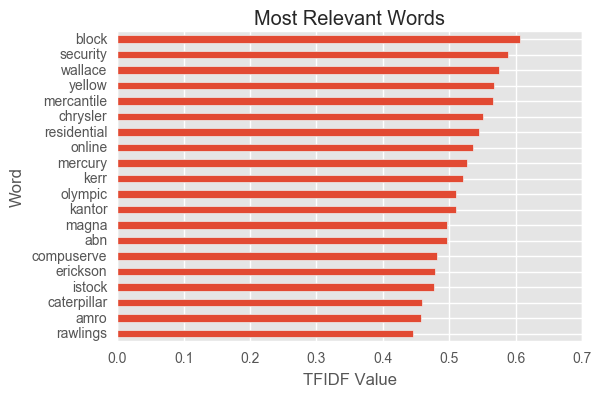

In [31]:
tfidf_mat = tfidf_vect.fit_transform(by_author['BradDorfman'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Darren Schuettler

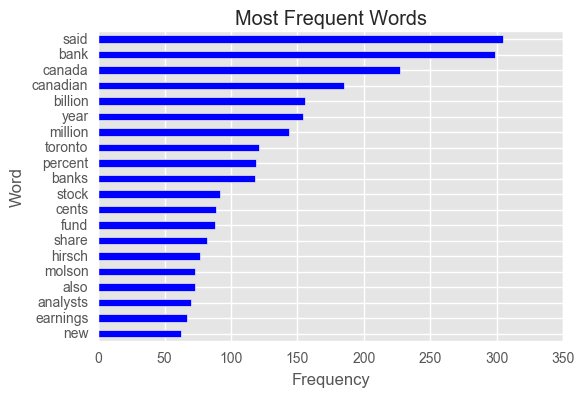

In [32]:
bag_words = count_vect.fit_transform(by_author['DarrenSchuettler'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

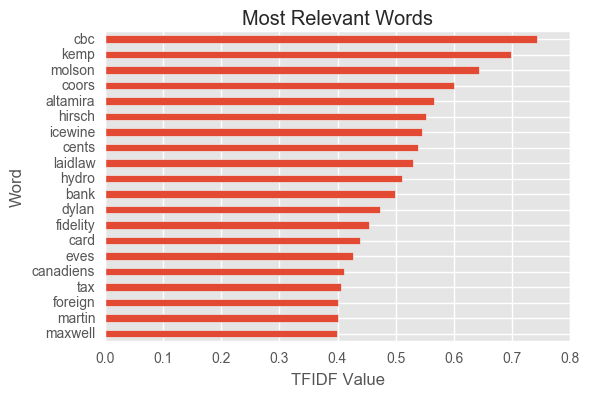

In [33]:
tfidf_mat = tfidf_vect.fit_transform(by_author['DarrenSchuettler'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### David Lawder

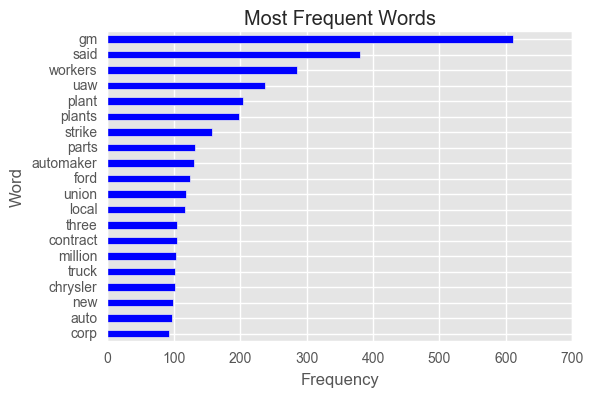

In [34]:
bag_words = count_vect.fit_transform(by_author['DavidLawder'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

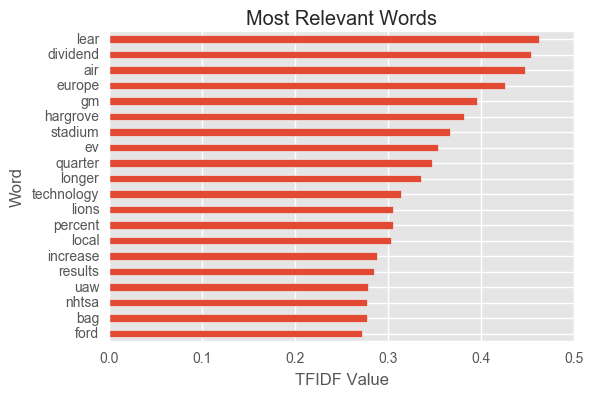

In [35]:
tfidf_mat = tfidf_vect.fit_transform(by_author['DavidLawder'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Edna Fernandes

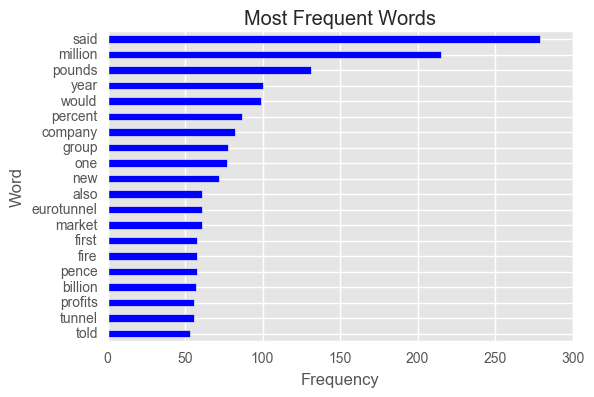

In [36]:
bag_words = count_vect.fit_transform(by_author['EdnaFernandes'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

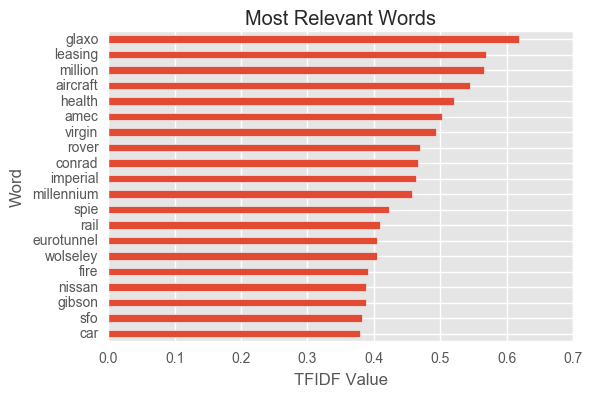

In [37]:
tfidf_mat = tfidf_vect.fit_transform(by_author['EdnaFernandes'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Eric Auchard

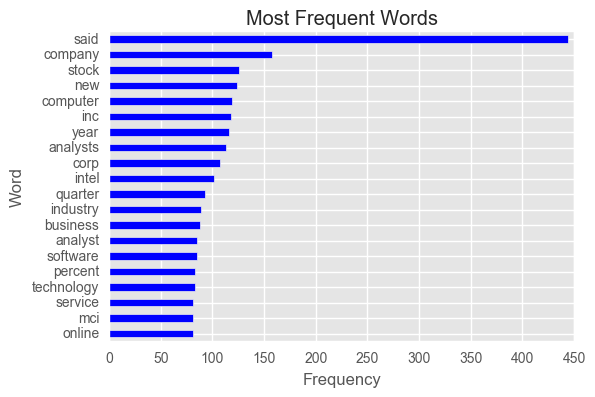

In [38]:
bag_words = count_vect.fit_transform(by_author['EricAuchard'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

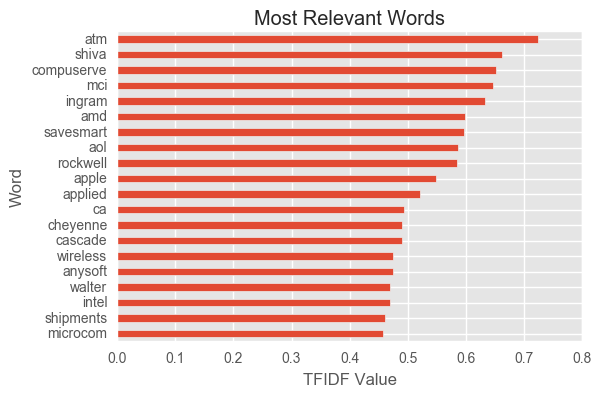

In [39]:
tfidf_mat = tfidf_vect.fit_transform(by_author['EricAuchard'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

## All Authors Visualization

The first graph shows a seaborn kdeplot of each author's top 20 word frequency's computed by the sum of each authors columns in the bag of words model. By visualizing the data in this manner we can attempt to differenciate each authors writing styles by looking at the highest frequency of words. Unfortunately this graph becomes really cluttered at 50 different authors and is hard to differenciate between the authors, so this would not entirely be useful for predicting or modeling texts with authors. However if we took two authors and compared them we can see slight differences. So this would be useful for narrowing down predictions given 2 or 3 authors.

/Users/erikgabrielsen/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


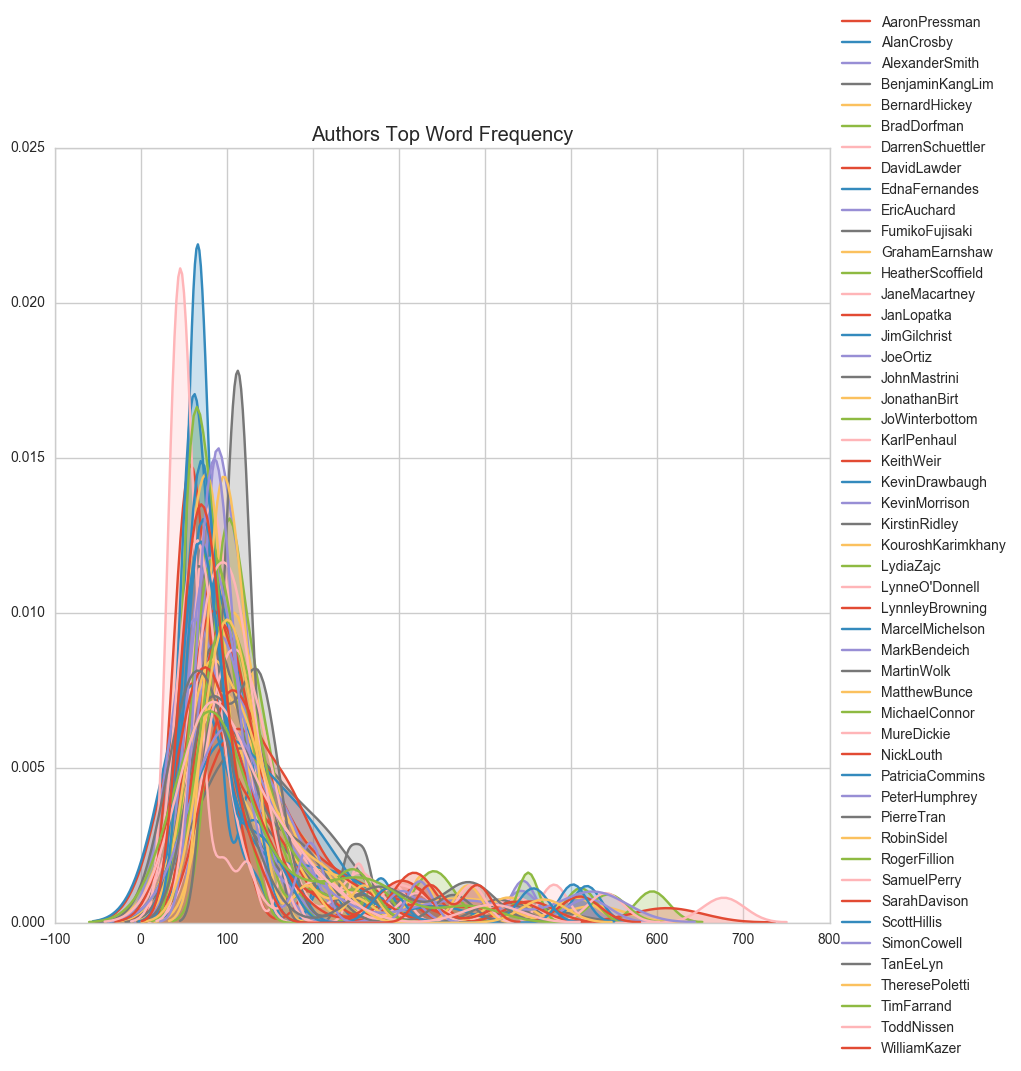

In [72]:
import itertools

author_names = []
for author in os.listdir(directory):
    author_names.append(author)

ax = sns.set_style('whitegrid')
palette = itertools.cycle(sns.color_palette())

plt.figure(figsize=(10,10))    
for author in author_names:
    bag_words = count_vect.fit_transform(by_author[author])
    df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
    freq = df_frequency.sum().sort_values()[-20:]
    sns.kdeplot(np.array(freq), color=next(palette), shade=True, label=author)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Authors Top Word Frequency")

The next graph depicts the seabord kdeplot of authors and their top 20 TF-IDF ranked words used. With this representation we can see a slightly better difference between all the authors and it is interesting to see that with each author we see a common distribution of the TF-IDF of words. In other words it could be possible to predict a text's author by ranking the TF-IDF on the text and comparing it to each author, as authors will tend to use a certain set of relevant words. 

/Users/erikgabrielsen/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


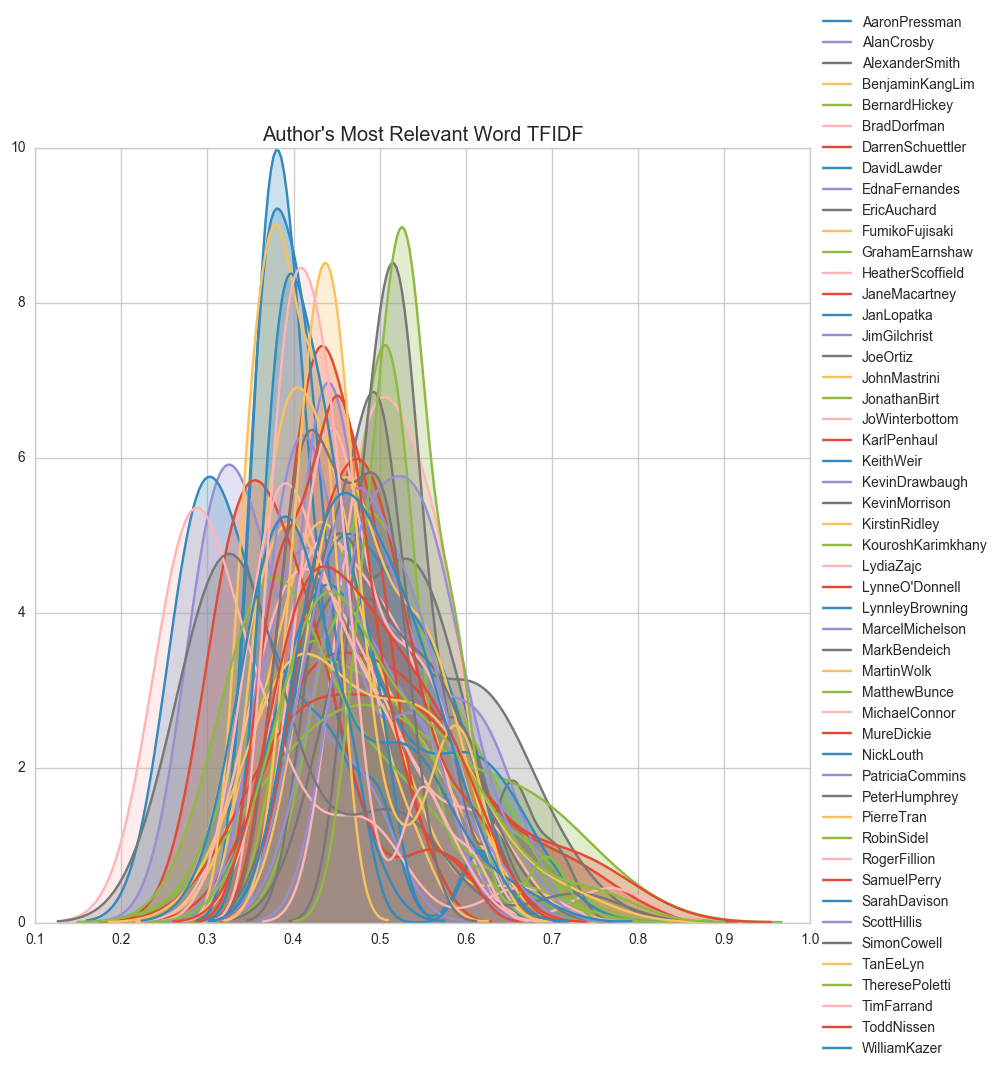

In [69]:
plt.figure(figsize=(10,10))    
for author in author_names:
    tfidf_mat = tfidf_vect.fit_transform(by_author[author])
    df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
    most_rel = df.max().sort_values()[-20:]
    sns.kdeplot(np.array(most_rel), color=next(palette), shade=True, label=author)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Author's Most Relevant Word TFIDF")
plt.show()


The following graph is a visualization of all 50 authors and their respective top 20 most relevant word TF-IDF's. We can see a general trend here that almost looks exponential as we approach the number 1 most relevant word for an author. This may suggest that each author chooses to write about one specific topic very often. 

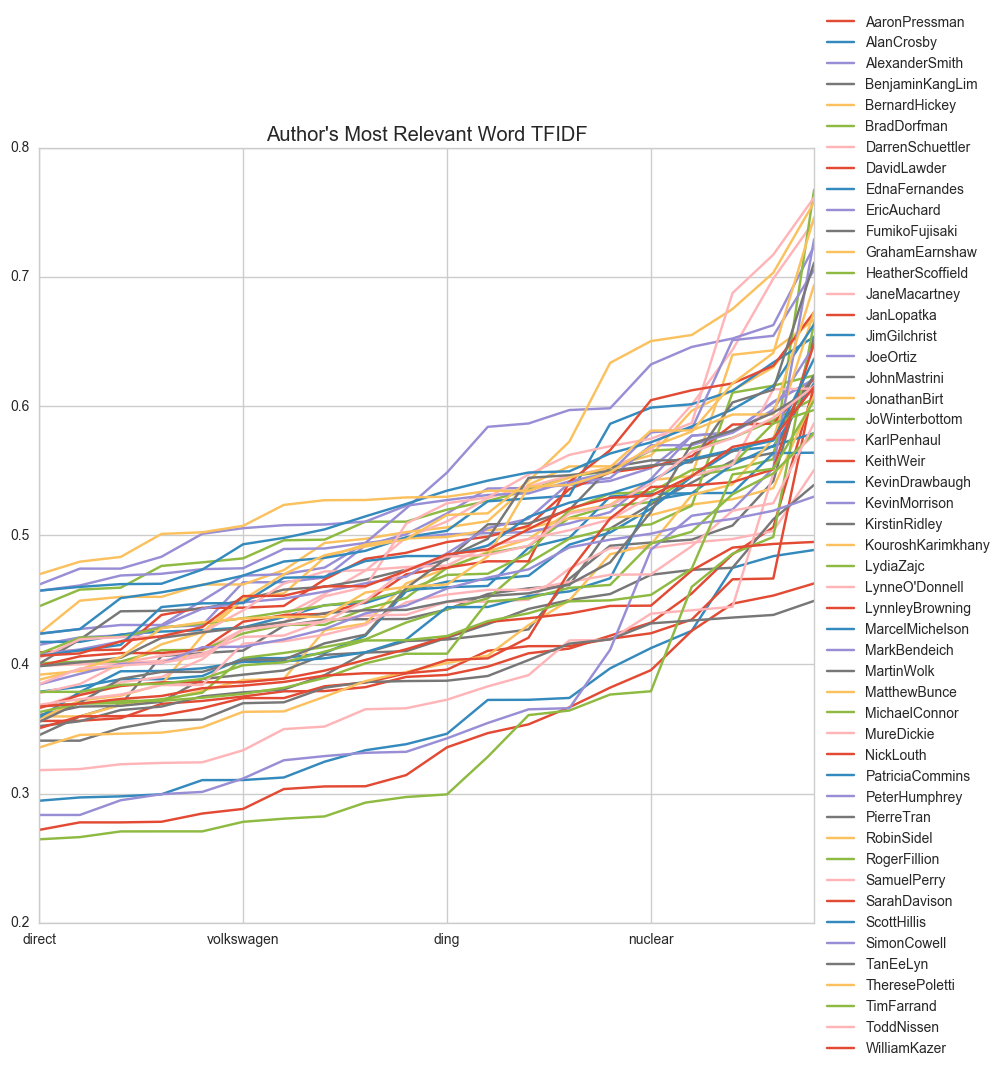

In [70]:
plt.figure(figsize=(10,10))    
for author in author_names:
    tfidf_mat = tfidf_vect.fit_transform(by_author[author])
    df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
    most_rel = df.max().sort_values()[-20:]
    df.cumsum()
    df.max().sort_values()[-20:].plot(label=author)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Author's Most Relevant Word TFIDF")
plt.show()


Finally is a visualization of each of the 50 authors top 20 most frequent words used. Its interesting to see that some authors are much more repetative than others.

In [10]:
plt.figure(figsize=(10,10))    

for author in author_names:
    bag_words = count_vect.fit_transform(by_author[author])
    df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
    freq = df_frequency.sum().sort_values()[-20:]
    df_frequency.cumsum()
    df_frequency.max().sort_values()[-20:].plot(label=author)

    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Author's Most Frequent Words")
plt.show()

NameError: name 'author_names' is not defined